In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [2]:
data1 = pd.read_csv("cancer_reg.csv")
print(data1)

      avganncount  avgdeathsperyear  target_deathrate  incidencerate  \
0     1397.000000               469             164.9     489.800000   
1      173.000000                70             161.3     411.600000   
2      102.000000                50             174.7     349.700000   
3      427.000000               202             194.8     430.400000   
4       57.000000                26             144.4     350.100000   
...           ...               ...               ...            ...   
3042  1962.667684                15             149.6     453.549422   
3043  1962.667684                43             150.1     453.549422   
3044  1962.667684                46             153.9     453.549422   
3045  1962.667684                52             175.0     453.549422   
3046  1962.667684                48             213.6     453.549422   

      medincome  popest2015  povertypercent  studypercap           binnedinc  \
0         61898      260131            11.2   499.74820

In [3]:
data2 = pd.read_csv("avg-household-size.csv")
print(data2)

      statefips  countyfips  avghouseholdsize  \
0             2          13              2.43   
1             2          16              3.59   
2             2          20              2.77   
3             2          50              3.86   
4             2          60              2.50   
...         ...         ...               ...   
3215         56          37              2.64   
3216         56          39              2.63   
3217         56          41              2.76   
3218         56          43              2.34   
3219         56          45              2.27   

                               geography  
0         Aleutians East Borough, Alaska  
1     Aleutians West Census Area, Alaska  
2         Anchorage Municipality, Alaska  
3             Bethel Census Area, Alaska  
4            Bristol Bay Borough, Alaska  
...                                  ...  
3215          Sweetwater County, Wyoming  
3216               Teton County, Wyoming  
3217               Uinta

In [4]:
data_merged = data1.merge(data2, how = 'outer')
dataset = data_merged
dataset

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,statefips,countyfips,avghouseholdsize
0,1397.0,469.0,164.9,489.8,61898.0,260131.0,11.2,499.748204,"(61494.5, 125635]",39.3,...,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,53,35,2.54
1,173.0,70.0,161.3,411.6,48127.0,43269.0,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,53,37,2.34
2,102.0,50.0,174.7,349.7,49348.0,21026.0,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,53,39,2.62
3,427.0,202.0,194.8,430.4,44243.0,75882.0,17.1,342.637253,"(42724.4, 45201]",42.8,...,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,53,41,2.52
4,57.0,26.0,144.4,350.1,49955.0,10321.0,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,53,43,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,600,2.70
3216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,640,2.19
3217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,678,2.04
3218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,685,3.31


In [5]:
dataset = dataset.drop('pctsomecol18_24', axis=1)
dataset = dataset.drop('binnedinc', axis = 1)
dataset=dataset.drop('geography', axis=1)


In [6]:
df=dataset.astype('float32')
df.fillna(df.mean(), inplace = True)

In [7]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
scaler = MinMaxScaler()
scaler.fit(df)
df[:] = scaler.fit_transform(df[:])
df_scaled = pd.DataFrame(df[:], columns = df.columns[:])
df_scaled
                           

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,statefips,countyfips,avghouseholdsize
0,0.036467,0.033269,0.347080,0.286893,0.381164,0.025498,0.180995,0.051192,0.028253,0.342790,...,0.259091,0.797112,0.030190,0.113138,0.043965,0.542157,0.286917,0.732394,0.040524,0.348214
1,0.004378,0.004783,0.335203,0.209129,0.247459,0.004173,0.348416,0.002367,0.017783,0.231679,...,0.288636,0.880051,0.011275,0.052704,0.089228,0.406297,0.203182,0.732394,0.042908,0.288690
2,0.002517,0.003355,0.379413,0.147574,0.259314,0.001986,0.257919,0.004872,0.037726,0.510638,...,0.420455,0.898912,0.008606,0.010932,0.065522,0.571001,0.174879,0.732394,0.045292,0.372024
3,0.011037,0.014207,0.445728,0.227824,0.209748,0.007380,0.314480,0.035098,0.034070,0.468085,...,0.509091,0.908071,0.009106,0.027250,0.032498,0.508852,0.215878,0.732394,0.047676,0.342262
4,0.001337,0.001642,0.279446,0.147971,0.265207,0.000934,0.210407,0.000000,0.043211,0.600473,...,0.456818,0.934344,0.003144,0.015623,0.011737,0.563423,0.318700,0.732394,0.050060,0.288690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,0.015739,0.013062,0.392491,0.245593,0.237131,0.010011,0.309461,0.015918,0.038179,0.405927,...,0.378183,0.817878,0.105971,0.029422,0.047305,0.512888,0.264478,0.704225,0.713945,0.395833
3216,0.015739,0.013062,0.392491,0.245593,0.237131,0.010011,0.309461,0.015918,0.038179,0.405927,...,0.378183,0.817878,0.105971,0.029422,0.047305,0.512888,0.264478,0.704225,0.761621,0.244048
3217,0.015739,0.013062,0.392491,0.245593,0.237131,0.010011,0.309461,0.015918,0.038179,0.405927,...,0.378183,0.817878,0.105971,0.029422,0.047305,0.512888,0.264478,0.704225,0.806913,0.199405
3218,0.015739,0.013062,0.392491,0.245593,0.237131,0.010011,0.309461,0.015918,0.038179,0.405927,...,0.378183,0.817878,0.105971,0.029422,0.047305,0.512888,0.264478,0.704225,0.815256,0.577381


In [8]:
from sklearn.model_selection import train_test_split 
X = df_scaled.drop(columns=['target_deathrate'])
y = df_scaled['target_deathrate']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


from sklearn.linear_model import LinearRegression

multiple_linear_reg = LinearRegression(fit_intercept=False)
multiple_linear_reg.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [9]:
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import r2_score  
from sklearn.metrics import mean_squared_error  
from math import sqrt 

y_pred_MLR_train = multiple_linear_reg.predict(x_train)
y_pred_MLR_test = multiple_linear_reg.predict(x_test)

accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training R2 for Multiple Linear Regression Model: ", accuracy_MLR_train)

accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing R2 for Multiple Linear Regression Model: ", accuracy_MLR_test)

RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

Training R2 for Multiple Linear Regression Model:  0.5216109536253621
Testing R2 for Multiple Linear Regression Model:  0.466565357399807
RMSE for Training Data:  0.06133183093020352
RMSE for Testing Data:  0.06585418299462892


In [10]:
true_val = y_train
pred_val = y_pred_MLR_train

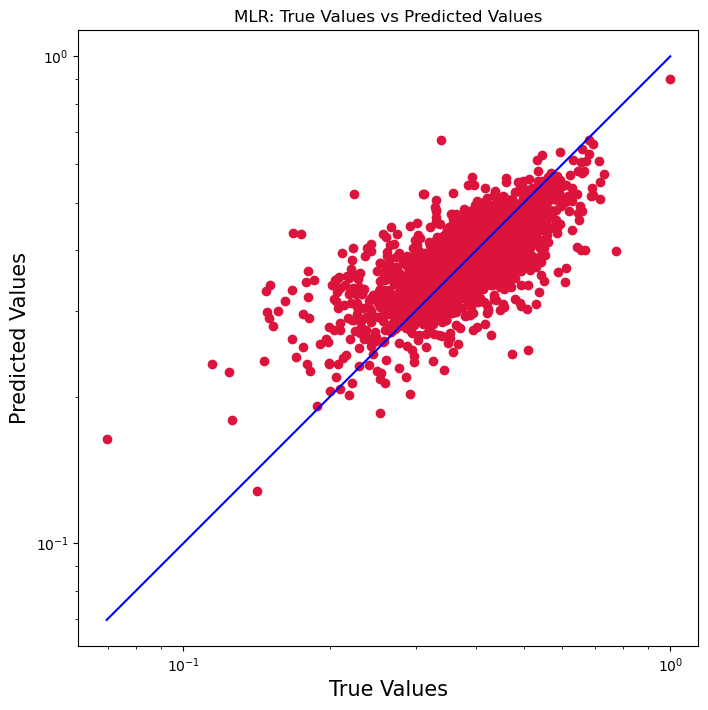

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(true_val, pred_val, c ='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred_val), max(true_val))
p2 = min(min(pred_val), min(true_val))
plt.plot([p1,p2], [p1,p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("MLR: True Values vs Predicted Values")
plt.axis('equal')
plt.show()